<a href="https://colab.research.google.com/github/victorviro/Machine-Learning-Python/blob/master/ML_metrics_and_cost_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of contents


1. [Introduction](#1)
2. [Notation](#2)
3. [Imports](#3)
4. [Regression](#4)
    1. [Metrics](#4.1)
        1. [Mean squared error (MSE)](#4.1.1)
        2. [Mean absolute error (MAE)](#4.1.2)
        3. [Max error](#4.1.3)
        4. [Mean squared logarithmic error (MSLE)](#4.1.4)
        5. [Mean absolute percentage error (MAPE)](#4.1.5)
        6. [Median absolute erro (MedAE)](#4.1.6)
        7. [Explained variance](#4.1.7)
        8. [Coefficient of determination (R²)](#4.1.8)
    2. [Cost functions](#4.2)
        1. [Huber](#4.2.1)
        2. [Logcosh](#4.2.2)
5. [Classification](#5)
    1. [Metrics](#5.1)
        1. [Cofusion matrix](#5.1.1)
        2. [Accuracy](#5.1.2)
        3. [Recall](#5.1.3)
        4. [Precision](#5.1.4)
        5. [F1-score](#5.1.5)
        6. [Classification report](#5.1.6)
        6. [ROC curve](#5.1.7)
    2. [Cost functions](#5.2)
        1. [Binary cross-entropy](#5.2.1)
        2. [Categorical cross-entropy](#5.2.2)
        3. [Hamming loss](#5.2.3)
    
6. [References](#6)




# Introduction <a name="1"></a>

In ML, losses and metrics are conceptually not the same things: 

- **Losses** are used by the algorithms (like Gradient Descent) and **optimized** during the training of the model, so they usually are differentiable (at least where they are evaluated) and their gradients are not 0 everywhere. Plus, it’s okay if they are **not easily interpretable** by humans (e.g. cross-entropy). The loss function usually refers to the error for a single training example while the cost function usually refers to the average of the loss functions of the entire set. However, some people use these terms interchangeably.

- In contrast, **metrics** are used to **evaluate a model**, they must be more **easily interpretable**, and they can be non-differentiable or have 0 gradients everywhere (e.g., accuracy).

That said, in most cases, defining a metric function is exactly the same as defining a loss function. For example, it's common for regression tasks, the usage of the mean square error (MSE) for both metric and loss function.

In this notebook, we will dive into the most common metrics and cost functions used in ML, particularly, for both regression and classification supervised learning tasks.

# Notation <a name="2"></a>

- $\boldsymbol{X}$ is the matrix of data where the columns represent the independent variables $\boldsymbol{x}_1,...,\boldsymbol{x}_p$, and the rows represent the observations $\boldsymbol{x}^{(1)},...,\boldsymbol{x}^{(m)}$.

$$
\boldsymbol{X}=
  \begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} .& . & . & x_p^{(1)} \\
    . & . & . & . & . \\
    . & . & . & . & . \\
    . & . & . & . & . \\
    x_1^{(m)} & x_2^{(m)} .& . & . & x_p^{(m)}
  \end{bmatrix}
=
  \begin{bmatrix}
    \boldsymbol{x}_1 & \boldsymbol{x}_2 & . & . & \boldsymbol{x}_p
  \end{bmatrix}
=
  \begin{bmatrix}
    \boldsymbol{x}^{(1)} \\
    \boldsymbol{x}^{(2)} \\
    . &\\
    . & \\
    \boldsymbol{x}^{(m)}
  \end{bmatrix}
$$

- $\boldsymbol{y}=(y^{(1)} ... y^{(m)})^T$ is the target variable (continuous or discrete/categorical)

- $\hat{\boldsymbol{y}}=(\hat{y}^{(1)} ... \hat{y}^{(m)})^T$ is the predicted variable.

# Imports <a name="3"></a>

In [1]:
import numpy as np
import tensorflow as tf

In [ ]:
!pip install scikit-learn==0.24.1
!pip install tensorflow-addons
# You must restart the runtime in order to use newly installed versions.

# Regression <a name="4"></a>

In machine learning, regression algorithms attempt to estimate the mapping function ($f$) from the input variables ($\boldsymbol{X}$) to numerical or continuous output variable ($\boldsymbol{y}$), $\hat{\boldsymbol{y}}=f(\boldsymbol{X})$.

In this case, $\boldsymbol{y}$ is a real value vector where their elements can be integers or floating-point values. 

For example, when provided with a dataset about houses, and the task is to predict their prices, that is a regression task because the price will be a continuous output (an example is available [here](https://nbviewer.jupyter.org/github/victorviro/ML_algorithms_python/blob/master/Introduction_linear_regression_and_regularized_linear_models.ipynb)).

In [ ]:
y_true = np.array([3, 0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
m = y_true.shape[0]
residuals = y_true - y_pred

## Metrics <a name="4.1"></a>

### Mean Squared Error (MSE) <a name="4.1.1"></a>

The mean squared error metric computes the expected value of the squared (quadratic) error loss or $l_2$-norm loss.

$$\text{MSE}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})= \frac{1}{m}\sum_{i=1}^{m} (e^{(i)})^2 =  \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2$$

Due to the square, large errors are emphasized and have a relatively greater effect on the value of the performance metric (if $e^{(i)} > 1$). At the same time, the effect of relatively small errors ($e^{(i)} < 1$) will be even smaller.
Sometimes this property of the squared error is referred to as penalizing extreme errors or being susceptible to outliers. 

The squared error has a unit measure of squared units of data. This may not be intuitive, e.g. squared dollars. This could be reversed by taking the square root.

$$\text{RMSE}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})=\sqrt{\text{MSE}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})}$$

Squared error is acknowledged for its good mathematical properties. It is continuously differentiable which facilitates optimization.

In [ ]:
mse = np.average(residuals**2)
print(f'Mean squared error: {mse}')

Mean squared error: 0.375


In Scikit-learn, this metric is implemented with the [mean_squared_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) method.

In [ ]:
from sklearn.metrics import mean_squared_error

print(f'Mean squared error: {mean_squared_error(y_true, y_pred)}')

Mean squared error: 0.375


In Tensorflow, this metric is implemented with the [MeanSquaredError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanSquaredError) method.

In [ ]:
mse = tf.keras.metrics.MeanSquaredError()
print(f'Mean squared error: {mse(y_true, y_pred).numpy()}')

Mean squared error: 0.375


### Mean absolute error (MAE) <a name="4.1.2"></a>

The mean absolute error (MAE) metric computes the expected value of the absolute error or $l_1$-norm loss.

$$\text{MAE}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})= \frac{1}{m}\sum_{i=1}^{m} |e^{(i)}| =  \frac{1}{m}\sum_{i=1}^{m}|\hat{y}^{(i)} - y^{(i)}|$$

The idea behind the absolute error is to avoid the mutual cancellation of the positive and negative errors. The absolute error has only non-negative values.

Absolute error preserves the same units of measurement as the data under analysis and gives all individual errors the same weights (as compared to squared error).

In [ ]:
mae = np.average(np.abs(residuals))
print(f'Mean absolute error: {mae}')

Mean absolute error: 0.5


In Scikit-learn, this metric is implemented with the [mean_absolute_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error) method.

In [ ]:
from sklearn.metrics import mean_absolute_error

print(f'Mean absolute error: {mean_absolute_error(y_true, y_pred)}')

Mean absolute error: 0.5


In Tensorflow, this metric is implemented with the [MeanAbsoluteError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError) method.

In [ ]:
mae = tf.keras.metrics.MeanAbsoluteError()
print(f'Mean absolute error: {mae(y_true, y_pred).numpy()}')

Mean absolute error: 0.5


### Max error <a name="4.1.3"></a>

The max error metric computes the maximum residual error. It captures the worst-case error between the predicted value and the true value. In a perfectly fitted single-output regression model, the max error would be 0 on the training set, and thought this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.

$$\text{Max Error}(\boldsymbol{y}, \hat{\boldsymbol{y}}) = max(| y^{(i)} - \hat{y}^{(i)} |)$$

where $i=1,...,m$

In [ ]:
max_error = max(np.abs(residuals))
print(f'Max error: {max_error}')

Max error: 1.0


In Scikit-learn, this metric is implemented with the [max_error](https://scikit-learn.org/stable/modules/model_evaluation.html#max-error) method.

In [ ]:
from sklearn.metrics import max_error

print(f'Max error: {max_error(y_true, y_pred)}')

Max error: 1.0


### Mean squared logarithmic error (MSLE) <a name="4.1.4"></a>

The mean squared log error (MSLE) metric computes the expected value of the squared logarithmic (quadratic) error.

$$\text{MSLE}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})=  \frac{1}{m}\sum_{i=1}^{m}(\log_e(1+y^{(i)})-\log_e(1+\hat{y}^{(i)}))^2$$

This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over years, etc. Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate.

In [ ]:
msle = np.average((np.log1p(y_true) - np.log1p(y_pred))**2)
print(f'Mean squared log error: {msle}')

Mean squared log error: 0.0490263575494607


In Scikit-learn, this metric is implemented with the [mean_squared_log_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error) method.

In [ ]:
from sklearn.metrics import mean_squared_log_error

print(f'Mean squared log error: {mean_squared_log_error(y_true, y_pred)}')

Mean squared log error: 0.0490263575494607


In Tensorflow, this metric is implemented with the [MeanSquaredLogarithmicError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanSquaredLogarithmicError) method.

In [ ]:
msle = tf.keras.metrics.MeanSquaredLogarithmicError()
print(f'Mean squared log error: {msle(y_true, y_pred).numpy()}')

Mean squared log error: 0.04902633652091026


###  Mean absolute percentage error (MAPE) <a name="4.1.5"></a>

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is sensitive to relative errors. It is, for example, not changed by a global scaling of the target variable.

$$\text{MAPE}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}}) = \frac{1}{m} \sum_{i=1}^{m} \frac{{}\left| y^{(i)} - \hat{y}^{(i)} \right|}{max(\epsilon, \left| y^{(i)} \right|)}$$

Absolute percentage error does not preserve the same units of measurement as the data under analysis.

In [ ]:
absolute_percentage_error= np.abs(residuals)/np.maximum(np.abs(y_true), 0.0001)
mape = np.average(absolute_percentage_error)
print(f'Mean absolute percentage error: {mape}')

Mean absolute percentage error: 0.3273809523809524


In Scikit-learn, this metric is implemented with the [mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-percentage-error) method.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_true, y_pred)
print(f'Mean absolute percentage error: {mape}')

Mean absolute percentage error: 0.3273809523809524


In Tensorflow, this metric is implemented with the [MeanAbsolutePercentageError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsolutePercentageError) method.

In [ ]:
mape = tf.keras.metrics.MeanAbsolutePercentageError()

print(f'Mean absolute percentage error: {mape(y_true, y_pred).numpy()}')

Mean absolute percentage error: 32.738094329833984


### Median absolute error (MedAE) <a name="4.1.6"></a>

The median absolute error (MedAE) is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.

$$\text{MedAE}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}}) = \text{median}(\mid y^{(1)} - \hat{y}^{(1)} \mid, \ldots, \mid y^{(m)} - \hat{y}^{(m)} \mid)=\text{median}(\boldsymbol{|e|})$$

In [ ]:
medae = np.median(np.abs(residuals), axis=0)
print(f'Median absolute error: {medae}')

Median absolute error: 0.5


In Scikit-learn, this metric is implemented with the [mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-percentage-error) method.

In [ ]:
from sklearn.metrics import median_absolute_error

medae = median_absolute_error(y_true, y_pred)
print(f'Median absolute error: {medae}')

Median absolute error: 0.5


### Explained variance <a name="4.1.7"></a>

The explained variance relates the variance of the residuals with the variance of the target variable:

$$\text{explained variance}(\boldsymbol{y}, \hat{\boldsymbol{y}}) = 1 - \frac{Var\{\boldsymbol{y} - \hat{\boldsymbol{y}}\}}{Var\{\boldsymbol{y}\}}$$

- The best possible score is $1$, lower values are worse.

- If residuals are close to its mean (low sparsity or variability), then $Var\{\boldsymbol{y} - \hat{\boldsymbol{y}}\} \approx 0$ so the explained variance will be close to $1$.

- Much sparsity of residuals, bigger $Var\{\boldsymbol{y} - \hat{\boldsymbol{y}}\}$ and smaller explained variance.

In [ ]:
residuals_var = np.var(residuals, axis=0)
y_true_var = np.var(y_true, axis=0)
explained_variance = 1 - residuals_var/y_true_var
print(f'Explained variance: {explained_variance}')

Explained variance: 0.9353099730458221


In Scikit-learn, this metric is implemented with the [explained_variance_score](https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score) method.

In [ ]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_true, y_pred)
print(f'Explained variance: {explained_variance}')

Explained variance: 0.9353099730458221


### Coefficient of determination (R²) <a name="4.1.8"></a>

It represents the proportion of variance of the target variable ($\boldsymbol{y}$) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well-unseen samples are likely to be predicted by the model, though the proportion of explained variance.

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

$$R^2(\boldsymbol{y}, \hat{\boldsymbol{y}}) = 1-\frac{\sum_{i=1}^{m} (e^{(i)})^2}{\sum_{i=1}^{m} (y^{(i)} - \bar{\boldsymbol{y}})^2}  = 1 - \frac{\sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^{m} (y^{(i)} - \bar{\boldsymbol{y}})^2}= 1 - \frac{\sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2}{m\cdot \text{Var}(\boldsymbol{y})}= 1 - \frac{\text{MSE}(\boldsymbol{y}, \hat{\boldsymbol{y}})}{\text{Var}(\boldsymbol{y})}$$


- If the squared error sum is smaller than $m\text{Var}(\boldsymbol{y})$, then $R^2>0$. Smaller squared error sum, bigger $R^2$.

- If the squared error sum is equal to $m\text{Var}(\boldsymbol{y})$, then $R^2=1-1=0$. This happen, for example,  when the model is constant and predict the expected value of $\boldsymbol{y}$, that is $\hat{y}^{(i)}=\bar{\boldsymbol{y}}$ for all $i$.

- If the squared error sum is bigger than $m\text{Var}(\boldsymbol{y})$, then $R^2<0$. Bigger squared error sum, smaller $R^2$.

In [ ]:
r2 = 1-(np.average(residuals**2))/np.var(y_true)
print(f'Coefficient of determination: {r2}')

Coefficient of determination: 0.9353099730458221


In Scikit-learn, this metric is implemented with the [r2_score](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination) method.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
print(f'Coefficient of determination: {r2}')

Coefficient of determination: 0.9353099730458221


## Cost functions <a name="4.2"></a>

The cost function most used in regression tasks is the mean squared error (MSE).

### Huber <a name="4.2.1"></a>

The Huber loss applies a linear loss to samples that are classified as outliers. A sample is classified as an outlier if the absolute error of that sample is lesser than a certain threshold. It does not ignore the effect of the outliers but gives a lesser weight to them.

$$J(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})= \frac{1}{m} \sum_{i=1}^{m}L_{\epsilon}(\hat{y}^{(i)},y^{(i)})$$

where

$$
L_{\epsilon}(\hat{y}^{(i)},y^{(i)})=\begin{cases}
       \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2 ,&\quad\text{if }|\hat{y}^{(i)} - y^{(i)}|\le\epsilon\\
       \epsilon|\hat{y}^{(i)} - y^{(i)}|-\frac{1}{2}\epsilon ,&\quad\text{otherwhise}\\
     \end{cases}
$$
     

In [ ]:
delta = 1.
losses = np.where(np.abs(residuals) < delta,.5*(residuals)**2 , 
                  delta*(np.abs(residuals)-0.5*delta))
huber_loss = np.average(losses)
print(f'Huber loss: {huber_loss}')

0.1875

In Scikit-learn, the huber regression is implemented with the [`HuberRegressor`](https://scikit-learn.org/stable/modules/linear_model.html#huber-regression) model.

In Tensorflow, this cost function is implemented with the [Huber](https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber) loss.

In [ ]:
huber = tf.keras.losses.Huber()
print(f'Huber loss: {huber(y_true, y_pred).numpy()}')

Huber loss: 0.1875


### Logcosh <a name="4.2.2"></a>

As we mentioned previously, with MSE, the error explodes when we have outliers in our dataset, substantially distorting the computed error. On the other hand, MAE is too soft when the residuals are small. Another loss function which attempts to combine the best of both worlds is the **Logcosh loss function**.

$$\text{Log cosh}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})= \frac{1}{m}\sum_{i=1}^{m} \log{\text{cosh}(e^{(i)})}$$

$\log{\text{cosh}(x})$ is approximately equal to $\frac{(x^2)}{2}$ for small $x$ and to $|x|-\log{2}$ for large $x$. This means that the Logcosh loss works mostly like the mean squared error, but will not be so strongly affected by the occasional wildly incorrect predictions that are likely caused by outlier samples.

In [ ]:
np.average(np.log(np.cosh(residuals)))

0.1685024610998955

In Tensorflow, this cost function is implemented with the [LogCosh](https://www.tensorflow.org/api_docs/python/tf/keras/losses/LogCosh) method.

In [ ]:
tf.keras.losses.LogCosh

log_cosh = tf.keras.losses.LogCosh()
print(f'Log cosh loss: {log_cosh(y_true, y_pred).numpy()}')

Log cosh loss: 0.16850246489048004


# Classificarion <a name="5"></a>

In machine learning, classification algorithms attempt to estimate the mapping function ($f$) from the input variables ($\boldsymbol{X}$) to discrete or categorical output variable ($\boldsymbol{y}$), $\hat{\boldsymbol{y}}=f(\boldsymbol{X})$.

In this case, $\boldsymbol{y}$ is a categorical variable where each element depicts the label on which the instance is assigned to. 

- When the target variable has two possible labels, the problem is called **binary classification**. 

- When the target variable has more than two possible labels, the problem is called **multiclass classification**. Note that the classes must be mutually exclusive (each example can only be assigned to one category).

- When each example can be assigned to multiple categories, the problem is called **multi-label classification**.

## Metrics <a name="5.1"></a>

### Confusion matrix <a name="5.1.1"></a>

A **confusion matrix** (also called **error matrix**) is a specific table that allows visualization of the performance of a classifier. Each row of the matrix represents the instances in an actual/true class, while each column represents the instances in a predicted class (or vice versa, Wikipedia and other references may use a different convention for axes).

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

**Binary classification**

![](https://i.ibb.co/sHpMv3Q/confusion-matrix.png)

- True Positive (TP): the number of positive examples in the data that have been classified as positive.

- True Negative (TN): the number of negative examples in the data that have been classified as negative.

- False Negative (FN): the number of positive examples in the data that have been classified as negative.

- False Positive (TP): the number of negative examples in the data that have been classified as positive.

In [4]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 0]

In Scikit-learn, this metric is implemented with the [confusion_matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) method.

In [5]:
from sklearn.metrics import confusion_matrix

error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')

Confusion matrix:
[[2 0]
 [2 2]]


In Tensorflow, this metric is implemented with the [confusion_matrix](https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix) method.

In [6]:
error_matrix = tf.math.confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')

Confusion matrix:
[[2 0]
 [2 2]]


**Multiclass classification**

Generally, denoting the confusion matrix as $C :=(c_{ij})$, where $c_{ij}$ is the number of observations actually assigned to group $i$ in the data and predicted to be in group $j$, the confusion matrix with respect to one classification target $k \in \{1,2,...,N\}$ can be represented as follow:

![](https://i.ibb.co/b7n8ZBJ/multiclass-confusion-matrix.png)

- True Positive (TP): the number of examples actually assigned to group $k$ in the data that have been classified to be in the group $k$.

- True Negative (TN): the number of examples not actually assigned to group $k$ in the data that have not been classified to be in the group $k$.

- False Negative (FN): the number of examples actually assigned to group $k$ in the data that have been classified to be in another group.

- False Positive (TP): the number of examples not actually assigned to group $k$ in the data that have been classified to be in the group $k$.

In [7]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

error_matrix = confusion_matrix(y_true, y_pred)
# error_matrix = tf.math.confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')

Confusion matrix:
[[2 0 0]
 [0 0 1]
 [1 0 2]]


**Multi-label classification**

In this case, since an example can be labeled with more than one class, it's common to plot a "binary" confusion matrix for each class.

In Scikit-learn, this metric is implemented with the [multilabel_confusion_matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#multi-label-confusion-matrix) method.

In [6]:
from sklearn.metrics import multilabel_confusion_matrix

y_true = [[1, 0, 1], [0, 0, 1]]
y_pred = [[1, 0, 0], [1, 0, 1]]

error_matrices = multilabel_confusion_matrix(y_true, y_pred)
print(f'Confusion matrices:\n{error_matrices}')

Confusion matrices:
[[[0 1]
  [0 1]]

 [[2 0]
  [0 0]]

 [[0 0]
  [1 1]]]


### Accuracy <a name="5.1.2"></a>

The **accuracy** provides the amount of correctly classified examples by relating the number of correctly classified examples to the overall number of examples.

$$\text{Accuracy}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})=\frac{\sum_{i=1}^Nc_{ii}}{\sum_{i=1}^N\sum_{j=1}^Nc_{ij}} = \frac{\sum_{i=1}^Nc_{ii}}{m}$$

Of all examples in the data, what fraction of them the classifier has predicted correctly?

**Binary classification**

In [16]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 0]
# 6 examples, 4 correctly classified
m = len(y_true)
error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
accuracy = sum(error_matrix.diagonal())/m
# accuracy = np.average(np.equal(y_true, y_pred))
print(f'Accuracy: {accuracy}')

Confusion matrix:
[[2 0]
 [2 2]]
Accuracy: 0.6666666666666666


In Scikit-learn, this metric is implemented with the [accuracy_score](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) method.

In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6666666666666666


In Tensorflow, this metric is implemented with the [Accuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) method.

In [18]:
accuracy = tf.keras.metrics.Accuracy()
print(f'Accuracy: {accuracy(y_true, y_pred).numpy()}')

Accuracy: 0.6666666865348816


The [`BinaryAccuracy`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy) keras metric can be used to interpret probabilities (we can modify the `threshold` parameter, which is set `0.5` by default):

In [19]:
y_true = [1.0, 0.0, 1.0, 1.0, 0.0, 1.0]
y_pred = [0.4, 0.1, 1.0, 0.8, 0.1, 0.4]

accuracy = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
# accuracy = np.average(np.equal(y_true, np.round(y_pred)))
print(f'Binary accuracy score: {accuracy(y_true, y_pred).numpy()}')

accuracy = tf.keras.metrics.BinaryAccuracy(threshold=0.3)
print('Binary accuracy score with threshold=0.3'
      f': {accuracy(y_true, y_pred).numpy()}')

Binary accuracy score: 0.6666666865348816
Binary accuracy score with threshold=0.3: 1.0


**Note**: When we use accuracy, we assign an equal cost to false positives and false negatives. When that **dataset is imbalanced**, say it has 90% of instances in one class and only 10 % in the other, predict that every instance belongs to the majority class, get an accuracy of 90%. So, for imbalanced datasets, accuracy is not a good metric. Let's see an example:

In [20]:
y_true = [1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

Confusion matrix:
[[0 1]
 [0 9]]
Accuracy: 0.9


**Multiclass classification**

In [21]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
# 6 examples, 4 correctly classified
m = len(y_true)
error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
accuracy = sum(error_matrix.diagonal())/m
print(f'Accuracy: {accuracy}')

Confusion matrix:
[[2 0 0]
 [0 0 1]
 [1 0 2]]
Accuracy: 0.6666666666666666


In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

accuracy = tf.keras.metrics.Accuracy()
print(f'Accuracy: {accuracy(y_true, y_pred).numpy()}')

Accuracy: 0.6666666666666666
Accuracy: 0.6666666865348816


The [`CategoricalAccuracy`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/CategoricalAccuracy) Keras metric can be used to interpret probabilities.

**Top-k accuracy score** is a generalization of accuracy score. The difference is that a prediction is considered correct as long as the true label is associated with one of the $k$ highest predicted scores. `accuracy_score` is the special case of $k = 1$. In Scikit-learn, this metric is implemented with the [top_k_accuracy_score](https://scikit-learn.org/stable/modules/model_evaluation.html#top-k-accuracy-score) method.

In [23]:
from sklearn.metrics import top_k_accuracy_score

y_true = np.array([2, 0, 2, 2, 0, 1])
y_score = np.array([[0.6, 0.1, 0.3],
                    [0.7, 0.1, 0.2],
                    [0.3, 0.1, 0.6],
                    [0.1, 0.3, 0.6],
                    [0.7, 0.3, 0.0],
                    [0.1, 0.3, 0.6]])
print(f'Top-1 accuracy score: {top_k_accuracy_score(y_true, y_score, k=1)}')
print(f'Top-2 accuracy score: {top_k_accuracy_score(y_true, y_score, k=2)}')

Top-1 accuracy score: 0.6666666666666666
Top-2 accuracy score: 1.0


In Tensorflow, this metric is implemented with the [TopKCategoricalAccuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/TopKCategoricalAccuracy) method (a generalization of the [`CategoricalAccuracy`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/CategoricalAccuracy) metric). It requires one-hot labels.

In [ ]:
# The CategoricalAccuracy keras metric requires y_true in one-hot
classes_number = 3
y_true_one_hot = tf.one_hot(y_true.tolist(), depth=classes_number)

top_1_accuracy = tf.keras.metrics.TopKCategoricalAccuracy(k=1)
# top_1_accuracy = tf.keras.metrics.CategoricalAccuracy()
# np.average(np.equal(y_true, np.argmax(y_score, axis=-1)))
top_2_accuracy = tf.keras.metrics.TopKCategoricalAccuracy(k=2)

print(f'Top-1 accuracy score: {top_1_accuracy(y_true_one_hot, y_score)}')
print(f'Top-2 accuracy score: {top_2_accuracy(y_true_one_hot, y_score)}')

Top-1 accuracy score: 0.6666666865348816
Top-2 accuracy score: 1.0


**Multi-label classification**

In multi-label classification, the [accuracy_score](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) Scikit-learn metric computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in `y_true`.

In [ ]:
from sklearn.metrics import accuracy_score
y_true = np.array([[1, 0, 1], [0, 0, 1]])
y_pred = np.array([[1, 0, 0], [1, 0, 1]])
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

y_true = np.array([[1, 0, 1], [1, 0, 1]])
y_pred = np.array([[1, 0, 0], [1, 0, 1]])
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0
Accuracy: 0.5


This metric has a disadvantage. If the set of labels predicted for a sample does not exactly match but nearly, the accuracy will be equal to a set of labels predicted for a sample which matchs poorly:

In [ ]:
y_true = np.array([[1, 0, 1, 0, 1, 0, 0]])
y_pred = np.array([[1, 0, 1, 0, 1, 0, 1]])
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

y_true = np.array([[1, 0, 1, 0, 1, 0, 0]])
y_pred = np.array([[0, 1, 0, 1, 0, 1, 1]])
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Accuracy: 0.0
Accuracy: 0.0


The [top_k_accuracy_score](https://scikit-learn.org/stable/modules/model_evaluation.html#top-k-accuracy-score) Scikit-learn metric does not cover the multi-label case because it assumes that classes are mutually exclusive (multiclass classification). The same happens with the [`CategoricalAccuracy`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/CategoricalAccuracy) Keras metric. We could use the `Accuracy` or the `BinaryAccuracy` Keras metrics.

In [ ]:
y_true = np.array([[1, 0, 1, 0, 1, 0, 0]])
y_pred = np.array([[1, 0, 1, 0, 1, 0, 1]])
accuracy = tf.keras.metrics.Accuracy()
print(f'Accuracy score: {accuracy(y_true, y_pred).numpy()}')

y_true = np.array([[1, 0, 1, 0, 1, 0, 0]])
y_pred = np.array([[0, 1, 0, 1, 0, 1, 1]])
accuracy = tf.keras.metrics.Accuracy()
print(f'Accuracy score: {accuracy(y_true, y_pred)}')

Accuracy score: 0.8571428656578064
Accuracy score: 0.0


In [ ]:
y_true = np.array([[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]])
y_pred = np.array([[0.9, 0.2, 0.8, 0.3, 0.7, 0.1, 0.9]])

accuracy = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
# accuracy = np.average(np.equal(y_true, np.round(y_pred)))
print(f'Binary accuracy score: {accuracy(y_true, y_pred).numpy()}')

Binary accuracy score: 0.8571428656578064


However, this accuracy metric is not a good metric for multi-label classififcation tasks. Imagine we have 10 possible labels, since each example is assigned with a small set of these labels, we can get a high accuracy when our model predicts mostly zeros:

In [ ]:
y_true = np.array([
    [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]
)
y_pred = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
)

accuracy = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
print(f'Binary accuracy score: {accuracy(y_true, y_pred).numpy()}')

Binary accuracy score: 0.8500000238418579


### Recall <a name="5.1.3"></a>

The **recall** (often called **sensitivity** or **true positive rate**) represents the classifier’s ability to correctly classify a given class. It is provided by the amount of truly positive predicted examples (TP) related to the number of examples where the class actually happens (TP + TN). 

$$\text{Recall}_{\text{class}}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})=\frac{TP_{\text{class}}}{TP_{\text{class}}+FN_{\text{class}}}=\frac{c_{kk}}{\sum_{j=1}^Nc_{kj}}$$

Of all examples actually assigned to the class $k$ in the data, what fraction of them the classifier has predicted to be in group $k$?

In Scikit-learn, this metric is implemented with the [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) for binary, multiclass and multilabel classification. In TensorFlow, this metric is implemented with the [Recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall) method (it can be used to interpret probabilities but does not cover the multi-label case).

**Binary classification**

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 0]

error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
# If average="binary" (default), it returns the score for the positive class (1)
print(f'Recall of positive class: {recall_score(y_true, y_pred)}')
print(f'Recall of negative class: {recall_score(y_true, y_pred, pos_label=0)}')
# If average=None, it returns the scores for each class
print(f'Recall per class: {recall_score(y_true, y_pred, average=None)}')

recall = tf.keras.metrics.Recall()
print(f'Recall of positive class: {recall(y_true, y_pred).numpy()}')

Confusion matrix:
[[2 0]
 [2 2]]
Recall of positive class: 0.5
Recall of negative class: 1.0
Recall per class: [1.  0.5]
Recall of positive class: 0.5


**Multiclass classification**

In [ ]:
y_true = np.array([2, 0, 2, 2, 0, 1])
y_pred = np.array([0, 0, 2, 2, 0, 2])

error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
print(f'Recall per class: {recall_score(y_true, y_pred, average=None)}')
# If average="macro", it returns the mean of the recall of each label
print(f'Mean of recall: {recall_score(y_true, y_pred, average="macro")}')
# np.average(recall_score(y_true, y_pred, average=None))
# Set average="weighted" for imbalance datasets
print('Weighted mean of recall: '
      f'{recall_score(y_true, y_pred, average="weighted")}')

Confusion matrix:
[[2 0 0]
 [0 0 1]
 [1 0 2]]
Recall per class: [1.         0.         0.66666667]
Mean of recall: 0.5555555555555555
Weighted mean of recall: 0.6666666666666666


In [ ]:
# The Recall keras metric requires y_true in one-hot
classes_number = len(np.unique(y_true))
y_true_one_hot = tf.one_hot(y_true.tolist(), depth=classes_number)
y_score = np.array([[0.6, 0.1, 0.3],
                    [0.7, 0.1, 0.2],
                    [0.3, 0.1, 0.6],
                    [0.1, 0.3, 0.6],
                    [0.7, 0.3, 0.0],
                    [0.1, 0.3, 0.6]])
recall = tf.keras.metrics.Recall(top_k=1, class_id=2)
print(f'Recall of class 2: {recall(y_true_one_hot, y_score).numpy()}')

recall = tf.keras.metrics.Recall(top_k=2, class_id=2)
print(f'Top-2-recall of class 2: {recall(y_true_one_hot, y_score).numpy()}')

Recall of class 2: 0.6666666865348816
Top-2-recall of class 2: 1.0


**Multi-label classification**

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

y_true = np.array([[1, 0, 1], [0, 0, 1]])
y_pred = np.array([[1, 0, 0], [1, 0, 1]])

error_matrices = multilabel_confusion_matrix(y_true, y_pred)
print(f'Confusion matrices:\n{error_matrices}')
print('Recall per class: '
      f'{recall_score(y_true, y_pred, average=None, zero_division=0)}')
print('Mean of recall: '
      f'{recall_score(y_true, y_pred, average="macro", zero_division=0)}')

Confusion matrices:
[[[0 1]
  [0 1]]

 [[2 0]
  [0 0]]

 [[0 0]
  [1 1]]]
Recall per class: [1.  0.  0.5]
Mean of recall: 0.5


### Precision <a name="5.1.4"></a>

The **precision** (also called **positive predictive value**) represents the classifier’s certainty of correctly predicting a given class. The precision relates the amount of truly positive predicted (TP) examples to the number of examples where the particular class was predicted (TP + FP). 

$$\text{Precision}_{\text{class}}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})=\frac{TP_{\text{class}}}{TP_{\text{class}}+FP_{\text{class}}}=\frac{c_{kk}}{\sum_{j=1}^Nc_{jk}}$$

Of all examples predicted to be in the group $k$, what fraction of them actually are assigned to group $k$ in the data?

In Scikit-learn, this metric is implemented with the [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) for binary, multiclass and multilabel classification. In TensorFlow, this metric is implemented with the [Precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision) method (it can be used to interpret probabilities but does not cover the multi-label case).

**Binary classification**

In [ ]:
from sklearn.metrics import precision_score, confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 0]

error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
# If average="binary" (default), it returns the score for the positive class (1)
print(f'Precision of positive class: {precision_score(y_true, y_pred)}')
# If average=None, it returns the score for each class
print(f'Precision per class: {precision_score(y_true, y_pred, average=None)}')

recall = tf.keras.metrics.Precision()
print(f'Precision of positive class: {recall(y_true, y_pred).numpy()}')

Confusion matrix:
[[2 0]
 [2 2]]
Precision of positive class: 1.0
Precision per class: [0.5 1. ]
Precision of positive class: 1.0


**Multiclass classification**

In [ ]:
y_true = np.array([2, 0, 2, 2, 0, 1])
y_pred = np.array([0, 0, 2, 2, 0, 2])

error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
print('Precision per class: '
      f'{precision_score(y_true, y_pred, average=None, zero_division=0)}')
# If average="macro", it returns the mean of the recall of each label
print('Mean of precision: '
      f'{precision_score(y_true, y_pred, average="macro", zero_division=0)}')

Confusion matrix:
[[2 0 0]
 [0 0 1]
 [1 0 2]]
Precision per class: [0.66666667 0.         0.66666667]
Mean of precision: 0.4444444444444444


In [ ]:
# The Precision keras metric requires y_true in one-hot
y_true_one_hot = tf.one_hot(y_true.tolist(), depth=classes_number)
y_score = np.array([[0.6, 0.1, 0.3],
                    [0.7, 0.1, 0.2],
                    [0.3, 0.1, 0.6],
                    [0.1, 0.3, 0.6],
                    [0.7, 0.3, 0.0],
                    [0.1, 0.3, 0.6]])
recall = tf.keras.metrics.Precision(top_k=1, class_id=2)
print(f'Precision of class 2: {recall(y_true_one_hot, y_score).numpy()}')

Precision of class 2: 0.6666666865348816


**Multi-label classification**

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

y_true = np.array([[1, 0, 1], [0, 0, 1]])
y_pred = np.array([[1, 0, 0], [1, 0, 1]])

error_matrices = multilabel_confusion_matrix(y_true, y_pred)
print(f'Confusion matrices:\n{error_matrices}')
print('Precision per class: '
      f'{precision_score(y_true, y_pred, average=None, zero_division=0)}')
print('Mean of precision: '
      f'{precision_score(y_true, y_pred, average="macro", zero_division=0)}')

Confusion matrices:
[[[0 1]
  [0 1]]

 [[2 0]
  [0 0]]

 [[0 0]
  [1 1]]]
Precision per class: [0.5 0.  1. ]
Mean of precision: 0.5


### F1-Score <a name="5.1.5"></a>

The **F1-score** (or **F measure** or **balanced F-score**) is a measure that combines precision and recall. It indicates the fraction of correctly classified examples for each class within the dataset.


$$\text{F-score}_{\text{class}}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})=2 \cdot \frac{\text{Precision}_{\text{class}}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}}) \cdot \text{Recall}_{\text{class}}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})}{\text{Precision}_{\text{class}}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}}) + \text{Recall}_{\text{class}}(\boldsymbol{\boldsymbol{y},\hat{\boldsymbol{y}}})}$$

Of all examples classified to be in the group $k$ and all examples actually assigned to group $k$ in the data, what fraction of them have been predicted correctly?

In Scikit-learn, this metric is implemented with the [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) for binary, multiclass and multilabel classification. In Tensorflow Addons, this metric is implemented with the [F1Score](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score) method (it can be used to interpret probabilities, and we can modify the `threshold` parameter, which is set `0.5` by default).

**Binary classification**

In [9]:
from sklearn.metrics import f1_score, confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 0]

error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
# If average="binary" (default), it returns the score for the positive class (1)
print(f'F1-score of positive class: {f1_score(y_true, y_pred)}')
# If average=None, it returns the score for each class
print(f'F1-score per class: {f1_score(y_true, y_pred, average=None)}')


Confusion matrix:
[[2 0]
 [2 2]]
F1-score of positive class: 0.6666666666666666
F1-score per class: [0.66666667 0.66666667]


**Multiclass classification**

In [10]:
y_true = np.array([2, 0, 2, 2, 0, 1])
y_pred = np.array([0, 0, 2, 2, 0, 2])

error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
print(f'F1-score per class: {f1_score(y_true, y_pred, average=None)}')
# If average="macro", it returns the mean of the f1-score of each label
print(f'Mean of f1-scores: {f1_score(y_true, y_pred, average="macro")}')
# np.average(f1_score(y_true, y_pred, average=None))

Confusion matrix:
[[2 0 0]
 [0 0 1]
 [1 0 2]]
F1-score per class: [0.8        0.         0.66666667]
Mean of f1-scores: 0.48888888888888893


In [13]:
print(f'Mean of f1-scores: {f1_score(y_true, y_pred, average="weighted")}')

Mean of f1-scores: 0.6


In [14]:
import tensorflow_addons as tfa
y_true_one_hot = tf.one_hot(y_true.tolist(), depth=3)
y_score = np.array([[0.6, 0.1, 0.3],
                    [0.7, 0.1, 0.2],
                    [0.3, 0.1, 0.6],
                    [0.1, 0.3, 0.6],
                    [0.7, 0.3, 0.0],
                    [0.1, 0.3, 0.6]])


metric = tfa.metrics.F1Score(num_classes=3, threshold=0.5, average="macro")
metric(y_true_one_hot, y_score).numpy()

0.4888889

**Multi-label classification**

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

y_true = np.array([[1, 0, 1], [0, 0, 1]])
y_pred = np.array([[1, 0, 0], [1, 0, 1]])

error_matrices = multilabel_confusion_matrix(y_true, y_pred)
print(f'Confusion matrices:\n{error_matrices}')
print('F1-score per class: '
      f'{f1_score(y_true, y_pred, average=None, zero_division=0)}')
print('Mean of f1-scores: '
      f'{f1_score(y_true, y_pred, average="macro", zero_division=0)}')

Confusion matrices:
[[[0 1]
  [0 1]]

 [[2 0]
  [0 0]]

 [[0 0]
  [1 1]]]
F1-score per class: [0.66666667 0.         0.66666667]
Mean of f1-scores: 0.4444444444444444


### Classification report <a name="5.1.6"></a>

The [**`classification_report`**](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) Scikit-learn metric builds a text report showing the main classification metrics (accuracy, recall, precision, etc). It can be used for binary, multiclass, and multi-label classification.

**Binary classification**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 0]

error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')

print('Classification_report:\n'
      f'{classification_report(y_true, y_pred, zero_division=0)}')

Confusion matrix:
[[2 0]
 [2 2]]
Classification_report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



**Multiclass classification**

In [ ]:
y_true = np.array([2, 0, 2, 2, 0, 1])
y_pred = np.array([0, 0, 2, 2, 0, 2])

error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')

print('Classification_report:\n'
      f'{classification_report(y_true, y_pred, zero_division=0)}')

Confusion matrix:
[[2 0 0]
 [0 0 1]
 [1 0 2]]
Classification_report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



**Multi-label classification**

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

y_true = np.array([[1, 0, 1], [0, 0, 1]])
y_pred = np.array([[1, 0, 0], [1, 0, 1]])

error_matrices = multilabel_confusion_matrix(y_true, y_pred)
print(f'Confusion matrices:\n{error_matrices}')

print('Classification_report:\n'
      f'{classification_report(y_true, y_pred, zero_division=0)}')

Confusion matrices:
[[[0 1]
  [0 1]]

 [[2 0]
  [0 0]]

 [[0 0]
  [1 1]]]
Classification_report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         2

   micro avg       0.67      0.67      0.67         3
   macro avg       0.50      0.50      0.44         3
weighted avg       0.83      0.67      0.67         3
 samples avg       0.75      0.75      0.67         3



### ROC curve and AUC <a name="5.1.7"></a>

A **receiver operating characteristic (ROC) curve**, is a plot which illustrates the performance of a binary classifier as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (recall) vs. the fraction of false positives out of the negatives (called false positive rate, $\text{FPR}=\frac{\text{FP}}{\text{FP}+\text{TN}}$), at various threshold settings. FPR is one minus the specificity or true negative rate.

In Scikit-learn, this metric is implemented with the [`roc_curve`](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc) method for binary classification. 

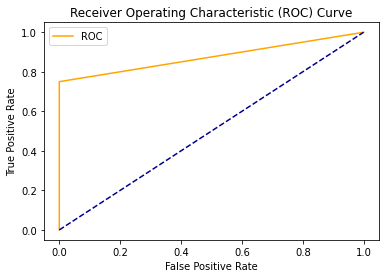

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = [1, 0, 1, 1, 0, 1]
y_pred_prob = [0.1, 0.1, 0.8, 0.9, 0.1, 0.4]
fper, tper, thresholds = roc_curve(y_true, y_pred_prob, pos_label=1)

def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fper, tper)

It's common to compute the **area under the ROC-curve (AUC)** as a way to summarize the ROC curve. 

In Scikit-learn, this metric is implemented with the [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) method (it can also be used for [multiclass](https://scikit-learn.org/stable/modules/model_evaluation.html#multi-class-case) and [multi-label](https://scikit-learn.org/stable/modules/model_evaluation.html#multi-label-case) classification). In TensorFlow, this metric is implemented with the [AUC](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC) method.

**Binary classification**

In [ ]:
from sklearn.metrics import roc_auc_score
area_under_curve = roc_auc_score(y_true, y_pred_prob)
print(f'Auc: {area_under_curve}')

auc = tf.keras.metrics.AUC()
area_under_curve = auc(y_true, y_pred_prob)
print(f'Auc: {area_under_curve}')

Auc: 0.875
Auc: 0.875


**Multiclass classification**

In [ ]:
y_true = np.array([2, 0, 2, 2, 0, 1])

y_score = np.array([[0.6, 0.1, 0.3],
                    [0.7, 0.1, 0.2],
                    [0.3, 0.1, 0.6],
                    [0.1, 0.3, 0.6],
                    [0.7, 0.3, 0.0],
                    [0.1, 0.3, 0.6]])
area_under_curve = roc_auc_score(y_true, y_score, multi_class="ovr")
print(f'Auc: {area_under_curve}')

Auc: 0.8592592592592593


**Multi-label classification**

In [ ]:
y_true = np.array([[1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [1.0, 1.0, 0.0]])
y_pred = np.array([[0.9, 0.1, 0.2], [0.4, 0.2, 0.8], [0.6, 0.7, 0.2]])

area_under_curve = roc_auc_score(y_true, y_pred, average=None)
print(f'Auc per label: {area_under_curve}')
area_under_curve = roc_auc_score(y_true, y_pred, average="macro")
print(f'Macro Auc: {area_under_curve}')

Auc per label: [1.   1.   0.75]
Macro Auc: 0.9166666666666666


In [ ]:
auc = tf.keras.metrics.AUC(multi_label=True)
area_under_curve = auc(y_true, y_pred)
print(f'Macro Auc: {area_under_curve}')

Macro Auc: 0.9166666865348816


In [ ]:
y_true = np.array([
    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]]
)
y_pred = np.array([
    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
)

auc = tf.keras.metrics.AUC(multi_label=True)
area_under_curve = auc(y_true, y_pred)
print(f'Macro Auc: {area_under_curve}')

Macro Auc: 0.800000011920929


## Cost functions <a name="5.2"></a>

### Binary cross-entropy  <a name="5.2.1"></a>

**Binary cross-entropy** (for binary classification) and **categorical cross-entropy** (the generalization for multi-class classification) are used to **evaluate the probability outputs** of a classifier instead of its discrete predictions.

For a binary classification with $\hat{p}^{(i)}$ the probability estimated that the target variable $y^{(i)}$ is equal to 1 given the input features $\boldsymbol{x}^{(i)}$, this is, the estimation of $P(y^{(i)}=1|X=\boldsymbol{x}^{(i)})$. The cost function is simply the average cost over all training instances (the average of loss functions).

$$J(\boldsymbol{\hat{\boldsymbol{p}},\boldsymbol{y}})=\frac{1}{m}\sum_{i=1}^{m}c(\hat{p}^{(i)},y^{(i)})$$

where the loss function, in this case called **logistic loss**, **log loss**, computed per sample, is the negative log-likelihood (assuming that the target variable $\boldsymbol{y}$ follow a binomial probability distribution) of the classifier given the true label:

$$c(p^{(i)},y^{(i)})=-(y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)}))$$


or equivalently,

$$
   c(p^{(i)},y^{(i)})  = \begin{cases}
               -log(\hat{p}^{(i)}) & \text{if } y^{(i)} = 1\\
               -log(1-\hat{p}^{(i)}) & \text{if } y^{(i)}=0
          \end{cases}
$$

This loss function makes sense.

- $-log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. 

- On the other hand, $-log(t)$ is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

This cost function is convex, so Gradient Descent (explained [here](https://nbviewer.jupyter.org/github/victorviro/ML_algorithms_python/blob/master/Introduction_gradient_descent_algorithm.ipynb)) or any other optimization algorithm (such as [Newton–Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method)) is guaranteed to find the global minimum.

In [36]:
y_true = np.array([0, 1, 1, 0])
y_pred_prob = np.array([.9, .1, .2, .65])

losses = -(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1-y_pred_prob))
print(f'Binary cross entropy loss: {np.average(losses)}')

Binary cross entropy loss: 1.8161075557302175


In Scikit-learn, this cost function is implemented with the [`log_loss`](https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss) method (it can also be used for multiclass classification). In TensorFlow, this cost function is implemented with the [BinaryCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) method.

In [37]:
from sklearn.metrics import log_loss
print(f'Binary cross entropy loss: {log_loss(y_true, y_pred_prob)}')

bce = tf.keras.losses.BinaryCrossentropy()
print(f'Binary cross entropy loss: {bce(y_true, y_pred_prob).numpy()}')
 

Binary cross entropy loss: 1.8161075557302175
Binary cross entropy loss: 1.816106915473938


### Categorical cross-entropy  <a name="5.2.2"></a>

The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function called the *cross-entropy*, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. 

$$J(\boldsymbol{\hat{\boldsymbol{p}},\boldsymbol{y}})= -\frac{1}{m}\sum_{i=1}^{m} \sum_{k=1}^{N} y^{(i)}_klog(\hat{p}_k^{(i)})$$

- $y^{(i)}_k$ is the target probability that the $i^{\text{th}}$ instance belongs to class $k$. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.


Notice that when there are just two classes ($N = 2$), this cost function is equivalent to the binary cross-entropy cost function. For $N>2$ we just calculate a separate loss for each class label per observation and sum the result.

In [ ]:
losses = (-y_true_one_hot*np.log(y_score+1e-9))
cce = np.average(np.sum(losses, axis=-1))
print(f'Categorical cross entropy loss: {cce}')

Categorical cross entropy loss: 0.6904911398887634


In Scikit-learn, this cost function is implemented with the [`log_loss`](https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss) method (the same we used for binary classification). In TensorFlow, this cost function is implemented with the [CategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) method.

In [ ]:
from sklearn.metrics import log_loss
print(f'Categorical cross entropy loss: {log_loss(y_true, y_score)}')

Categorical cross entropy loss: 0.69049112401022


In [ ]:
cce = tf.keras.losses.CategoricalCrossentropy()
print(f'Categorical cross entropy loss: {cce(y_true_one_hot, y_score).numpy()}')

Categorical cross entropy loss: 0.6904911398887634


### Hamming loss  <a name="5.2.3"></a>

In information theory, the **Hamming distance** between two strings of equal length is the number of positions at which the corresponding symbols are different. The symbols may be letters, bits, or decimal digits, among other possibilities.

![](https://www.researchgate.net/profile/Fredrick_Ishengoma/publication/264978395/figure/fig1/AS:295895569584128@1447558409105/Example-of-Hamming-Distance.png)

The hamming loss is the proportion of predictions that were incorrectly classified. 

- For binary and multiclass classification, the hamming loss is equal to $1-\text{accuracy}$.

In [ ]:
y_true = np.array([0, 0, 2, 2, 0, 2])
y_pred = np.array([2, 0, 2, 2, 0, 1])
# 6 examples, 4 correctly classified

hamming_loss = np.average(np.not_equal(y_pred, y_true))
print(f'Hamming loss: {hamming_loss}')

Hamming loss: 0.3333333333333333


In Scikit-learn, this metric is implemented with the [`hamming_loss`](https://scikit-learn.org/stable/modules/model_evaluation.html#hamming-loss) method which computes the average Hamming distance between two sets of samples.

In [ ]:
from sklearn.metrics import hamming_loss, accuracy_score
print(f'Hamming loss: {hamming_loss(y_true, y_pred)}')
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Hamming loss: 0.3333333333333333
Accuracy: 0.6666666666666666


In Tensorflow Addons, this metric is implemented with the [HammingLoss](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/HammingLoss) method (can be used to interpret probabilities, and we can modify the `threshold` parameter, which is set `0.5` by default).

In [ ]:
import tensorflow_addons as tfa

y_true_one_hot = tf.one_hot(y_true.tolist(), depth=3)
y_score = np.array([[0.3, 0.1, 0.6],
                    [0.7, 0.1, 0.2],
                    [0.3, 0.1, 0.6],
                    [0.1, 0.3, 0.6],
                    [0.7, 0.3, 0.0],
                    [0.1, 0.6, 0.3]])

hamming_loss = tfa.metrics.HammingLoss(mode='multiclass')
print(f'Hamming loss: {hamming_loss(y_true_one_hot, y_score).numpy()}')

hamming_loss = tfa.metrics.HammingLoss(mode='multiclass', threshold=0.2)
print('Hamming loss with threshold=0.2: '
      f'{hamming_loss(y_true_one_hot, y_score).numpy()}')

Hamming loss: 0.3333333432674408
Hamming loss with threshold=0.2: 0.0


**Note**: As occurs with accuracy metric, when the **dataset is imbalanced**, say it has 90% of instances in one class and only 10 % in the other, predict that every instance belongs to the majority class, get an accuracy of 0.9 (hamming loss of 0.1). So, for imbalanced datasets, the hamming loss is not a good cost function. Let's see an example:

In [ ]:
from sklearn.metrics import hamming_loss, accuracy_score

y_true = [1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
error_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion matrix:\n{error_matrix}')
print(f'Hamming loss: {hamming_loss(y_true, y_pred)}')
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Confusion matrix:
[[0 1]
 [0 9]]
Hamming loss: 0.1
Accuracy: 0.9


**Multi-label classification**

In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss

y_true = np.array([[1, 0, 1, 0, 1, 0, 0]])
y_pred = np.array([[0, 1, 0, 1, 0, 1, 1]])

hamming = tfa.metrics.HammingLoss(mode='multilabel')
print(f'Hamming loss: {hamming(y_true, y_pred).numpy()}')
print(f'Hamming loss: {hamming_loss(y_true, y_pred)}')

y_true = np.array([[1, 0, 1, 0, 1, 0, 0]])
y_pred = np.array([[1, 0, 1, 0, 1, 0, 1]])

hamming = tfa.metrics.HammingLoss(mode='multilabel')
print(f'Hamming loss: {hamming(y_true, y_pred).numpy()}')
print(f'Hamming loss: {hamming_loss(y_true, y_pred)}')

Hamming loss: 1.0
Hamming loss: 1.0
Hamming loss: 0.1428571492433548
Hamming loss: 0.14285714285714285


The [HammingLoss](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/HammingLoss) method can be used to interpret probabilities, and we can modify the `threshold` parameter, which is set `0.5` by default.

In [ ]:
y_true = np.array([[1, 0, 1, 0],
                   [0, 1, 0, 1],
                   [0, 0, 0, 1]], dtype=np.int32)
y_pred = np.array([[0.82, 0.5, 0.90, 0],
                   [0, 1, 0.4, 0.98],
                   [0.89, 0.79, 0, 0.3]], dtype=np.float32)

hamming_loss = tfa.metrics.HammingLoss(mode='multilabel', threshold=0.8)
print('Hamming loss with threshold=0.8: '
      f'{hamming_loss(y_true, y_pred).numpy()}')

Hamming loss with threshold=0.8: 0.1666666716337204


However, the hamming loss is not usually a good cost function for multi-label classififcation tasks. Imagine we have 10 possible labels, since each example is assigned with a small set of these labels, we can get a low hamming loss when our model predicts mostly zeros:

In [ ]:
y_true = np.array([
    [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]
)
y_pred = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
)

hamming_loss = tfa.metrics.HammingLoss(mode='multilabel')
print(f'Hamming loss: {hamming_loss(y_true, y_pred).numpy()}')

Hamming loss: 0.15000000596046448


# References <a name="6"></a>

- [Scikit-learn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

- [TensorFlow metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

- [Confusion matrix Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

- [Why is accuracy not the best measure for assessing classification models?](https://stats.stackexchange.com/questions/312780/why-is-accuracy-not-the-best-measure-for-assessing-classification-models)

- [How to use Logcosh with Keras?](https://www.machinecurve.com/index.php/2019/10/23/how-to-use-logcosh-with-keras/)


- [How does Keras calculate accuracy?](https://datascience.stackexchange.com/questions/14415/how-does-keras-calculate-accuracy)


- [Performance Metrics (Error Measures) in Machine Learning Regression](https://arxiv.org/abs/1809.03006)

- [Metrics for Multi-Class Classification: an Overview](https://arxiv.org/abs/2008.05756)